First part: Making a dataset

In [30]:
import kagglehub

# path = kagglehub.dataset_download("banuprakashv/news-articles-classification-dataset-for-nlp-and-ml")

# print("Path to dataset files:", path)

In [1]:
import pandas as pd

sports_path = "C:/Users/Ivan Savic/.cache/kagglehub/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml/versions/1/sports_data.csv"
sports_df = pd.read_csv(sports_path)

education_path = "C:/Users/Ivan Savic/.cache/kagglehub/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml/versions/1/education_data.csv"
education_df = pd.read_csv(education_path)

business_path = "C:/Users/Ivan Savic/.cache/kagglehub/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml/versions/1/business_data.csv"
business_df = pd.read_csv(business_path)

technology_path = "C:/Users/Ivan Savic/.cache/kagglehub/datasets/banuprakashv/news-articles-classification-dataset-for-nlp-and-ml/versions/1/technology_data.csv"
technology_df = pd.read_csv(technology_path)



In [2]:
business_df = business_df[['description']].copy()
business_df['formality_label'] = 1

sports_df = sports_df[['description']].copy()
sports_df['formality_label'] = 1

education_df = education_df[['description']].copy()
education_df['formality_label'] = 1

technology_df = technology_df[['description']].copy()
technology_df['formality_label'] = 1

# Combine all datasets into one
formal_dataset = pd.concat([business_df, sports_df, education_df, technology_df], ignore_index=True)


In [3]:
print(formal_dataset)

                                            description  formality_label
0     With the presentation of the interim budget on...                1
1     'In terms of market share, we aim to double it...                1
2     Air India currently has 117 operational aircra...                1
3     Rising attacks forced shippers to consider the...                1
4     Apart from fleet expansion, 2024 will also see...                1
...                                                 ...              ...
7995  The Vivaldi browser is now available on iOS an...                1
7996  The future is here. Meta unveils its next-gen ...                1
7997  Samsung might shift the launch window of its u...                1
7998  Dyson's success in floorcare tech lies in inno...                1
7999  ChatGPT became the fastest-growing consumer ap...                1

[8000 rows x 2 columns]


In [4]:
# path = kagglehub.dataset_download("smagnan/1-million-reddit-comments-from-40-subreddits")

# print("Path to dataset files:", path)

In [5]:
reddit_path = "C:/Users/Ivan Savic/.cache/kagglehub/datasets/smagnan/1-million-reddit-comments-from-40-subreddits/versions/1/kaggle_reddit_comments.csv"
reddit_df = pd.read_csv(reddit_path)

reddit_df = reddit_df[['body']].copy()

reddit_sampled = reddit_df.sample(n=10000, random_state=42)

reddit_sampled['formality_label'] = 0

reddit_sampled.rename(columns={'body': 'description'}, inplace=True)

final_dataset = pd.concat([formal_dataset, reddit_sampled], ignore_index=True)

final_dataset.to_csv("C:/Users/Ivan Savic/.cache/kagglehub/datasets/formality_dataset.csv", index=False)


Second part: Data processing & Feature engineering

In [6]:
import nltk

nltk.data.path.append("D:/nltk_data")

from nltk.tokenize import word_tokenize

final_dataset['tokens'] = final_dataset['description'].apply(lambda x: word_tokenize(str(x)))

import string

final_dataset['tokens'] = final_dataset['tokens'].apply(
    lambda words: [word.lower() for word in words if word not in string.punctuation]
)


In [7]:
print(final_dataset.shape)
print(final_dataset.columns)
print(final_dataset['tokens'][0])

(18000, 3)
Index(['description', 'formality_label', 'tokens'], dtype='object')
['with', 'the', 'presentation', 'of', 'the', 'interim', 'budget', 'on', 'february', '1', 'nirmala', 'sitharaman', 'will', 'surpass', 'the', 'records', 'of', 'her', 'predecessors', 'like', 'manmohan', 'singh', 'arun', 'jaitley', 'p', 'chidambaram', 'and', 'yashwant', 'sinha', 'who', 'had', 'presented', 'five', 'budgets', 'in', 'a', 'row']


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words=None, ngram_range=(1, 2)) 

final_dataset['clean_text'] = final_dataset['tokens'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectors = vectorizer.fit_transform(final_dataset['clean_text'])

final_dataset['tfidf_vector'] = tfidf_vectors.toarray().tolist()

In [9]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

embeddings = embedding_model.encode(final_dataset['description'].tolist(), show_progress_bar=True)

final_dataset['embedding_vector'] = embeddings.tolist()


Batches:   0%|          | 0/563 [00:00<?, ?it/s]

In [10]:
i=1501
print(final_dataset['description'][i])
print(final_dataset['tfidf_vector'][i])

Sebi said that registered investment advisers can give investment advisory services to foreign portfolio investors (FPIs).
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [11]:
print(final_dataset['tfidf_vector'].apply(lambda x: sum(x)).describe())


count    18000.000000
mean         4.241719
std          1.761487
min          0.000000
25%          3.102259
50%          4.146857
75%          5.072732
max         16.315360
Name: tfidf_vector, dtype: float64


In [12]:
final_dataset['tfidf_sum'] = final_dataset['tfidf_vector'].apply(lambda x: sum(x))

In [13]:
top_10_indices = final_dataset['tfidf_sum'][:8000].nlargest(10).index

print(top_10_indices.tolist())

zero_tfidf_indexes = final_dataset[final_dataset['tfidf_sum'] == 0].index.tolist()

print(zero_tfidf_indexes)
print(f"Total rows with tfidf_sum = 0: {len(zero_tfidf_indexes)}")

[468, 450, 6715, 3575, 5592, 5221, 439, 5231, 3458, 7496]
[8280, 8332, 8344, 8400, 8493, 8495, 8519, 8726, 8903, 8977, 9043, 9229, 9236, 9350, 9353, 9534, 9745, 9811, 9820, 10028, 10179, 10571, 10656, 11155, 11235, 11323, 11527, 11721, 11786, 11876, 12052, 12243, 12271, 12331, 12553, 12575, 12860, 12927, 13095, 13274, 13389, 13457, 13556, 13644, 13901, 13928, 13944, 14208, 14398, 14467, 14528, 14847, 14859, 14866, 15076, 15092, 15258, 15263, 15498, 15548, 15630, 15645, 15699, 15999, 16057, 16351, 16400, 16420, 16459, 16690, 16805, 16883, 16962, 16989, 16990, 17076, 17124, 17194, 17211, 17472, 17564, 17576, 17622, 17722, 17921]
Total rows with tfidf_sum = 0: 85


In [14]:
i = 468
print(final_dataset['description'][i])
print(final_dataset['tfidf_vector'][i])
print(final_dataset['formality_label'][i])
print(final_dataset['tfidf_sum'][i])

“These are the initial days. You have the larger template, flag points. So you are going to be able to get the template out for nations to decide how they want to have their own legislative framework and other things. So it will be too early, maybe the early stage of Brazilian presidency will come out with a bit more clarification,” she said.
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1124739446333981, 0.11269215196631577, 0.0, 0.0, 0.0, 0.0

In [15]:
import re
final_dataset['special_char_count'] = final_dataset['description'].apply(lambda x: len(re.findall(r'[@#\*\(\):;<>+=_\-]', x)))

import string
final_dataset['punctuation_ratio'] = final_dataset['description'].apply(lambda x: sum(1 for char in x if char in string.punctuation) / (len(x) + 1e-6))

In [16]:
final_dataset['avg_word_length'] = final_dataset['description'].apply(lambda x: sum(len(word) for word in x.split()) / (len(x.split()) + 1e-6))

In [17]:
print(final_dataset['avg_word_length'][8171])

# Count the number of rows where the sum of TF-IDF values is 0
zero_tfidf_count = (final_dataset['tfidf_vector'].apply(lambda x: sum(x)) == 0).sum()

print(f"Number of TF-IDF vectors with sum 0: {zero_tfidf_count}")
print(f"Percentage of zero TF-IDF vectors: {zero_tfidf_count / len(final_dataset) * 100:.2f}%")


4.989847690406864
Number of TF-IDF vectors with sum 0: 85
Percentage of zero TF-IDF vectors: 0.47%


In [18]:
print(final_dataset['punctuation_ratio'][171])
print(final_dataset['special_char_count'][8171])
print(final_dataset.columns)

0.06842105227146815
16
Index(['description', 'formality_label', 'tokens', 'clean_text',
       'tfidf_vector', 'embedding_vector', 'tfidf_sum', 'special_char_count',
       'punctuation_ratio', 'avg_word_length'],
      dtype='object')


In [19]:
import numpy as np

tfidf_matrix = np.array(final_dataset['tfidf_vector'].tolist())  
embedding_matrix = np.array(final_dataset['embedding_vector'].tolist())  

handcrafted_features = final_dataset[['avg_word_length',
                                      'punctuation_ratio', 'special_char_count']].values  

X = np.hstack((tfidf_matrix, embedding_matrix, handcrafted_features))

y = final_dataset['formality_label']

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

feature_importances = rf_model.feature_importances_


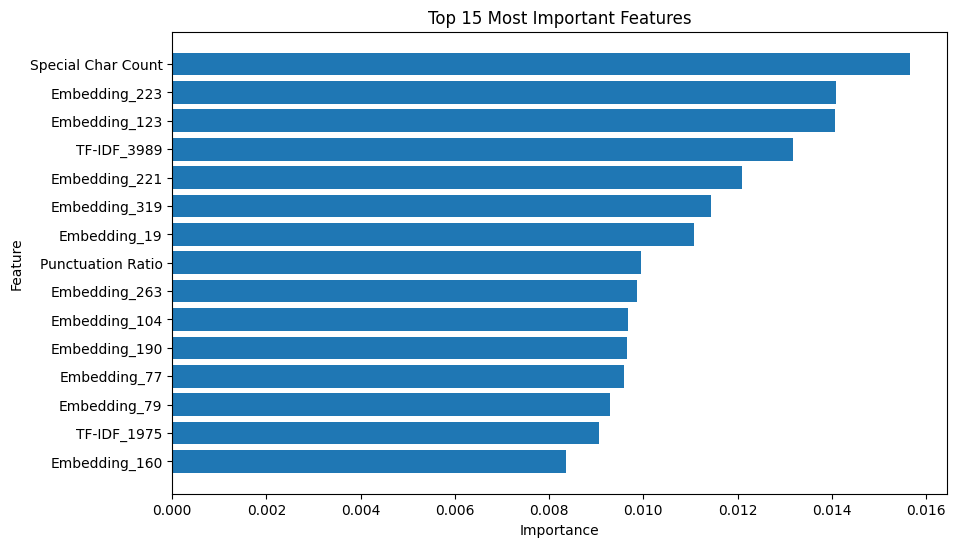

In [ ]:
import matplotlib.pyplot as plt

num_tfidf_features = tfidf_matrix.shape[1]
num_embedding_features = embedding_matrix.shape[1]
num_handcrafted_features = 3 

feature_names = (
    [f'TF-IDF_{i}' for i in range(num_tfidf_features)] +
    [f'Embedding_{i}' for i in range(num_embedding_features)] +
    ['Special Char Count', 'Punctuation Ratio', 'Avg Word Length']
)

if len(feature_names) != len(feature_importances):
    print(f"Mismatch: {len(feature_names)} feature names vs. {len(feature_importances)} importance values")
else:

    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

    importance_df = importance_df.sort_values(by="Importance", ascending=False).head(15)

    # Plot feature importance
    plt.figure(figsize=(10,6))
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Top 15 Most Important Features")
    plt.gca().invert_yaxis()
    plt.show()


Model training & Evaluation

In [21]:
from sklearn.model_selection import train_test_split

X = np.hstack((tfidf_matrix, embedding_matrix, handcrafted_features))
y = final_dataset['formality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

rf_model_final = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=20)
rf_model_final.fit(X_train, y_train)

y_pred = rf_model_final.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Evaluation using RandomForest")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Evaluation using RandomForest
Test Accuracy: 0.9493
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      3000
           1       0.98      0.90      0.94      2400

    accuracy                           0.95      5400
   macro avg       0.95      0.94      0.95      5400
weighted avg       0.95      0.95      0.95      5400



In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_test_indices = final_dataset.iloc[y_test.index].index

# Create a DataFrame with misclassified examples
misclassified = final_dataset.iloc[X_test_indices][y_pred != y_test].copy()

print(len(misclassified))

i = 2

print(misclassified.iloc[i]['description'])

print(f"Predicted Formality: {y_pred[y_pred != y_test][i]}")
print(f"Actual Formality: {y_test[y_pred != y_test].iloc[i]}")

274
Irishman McGregor, the organisation's former featherweight and lightweight champion and the first UFC fighter to hold two world titles simultaneously, has not fought since suffering a gruesome leg break against Dustin Poirier in July 2021.
Predicted Formality: 0
Actual Formality: 1


In [23]:
print(misclassified[['description', 'formality_label']])

                                            description  formality_label
7680  In an example of the potential of the ALERTCal...                1
6993  Need to format your Google Docs with double sp...                1
3632  Irishman McGregor, the organisation's former f...                1
3932  Some women fans wear scarves, some don’t, but ...                1
6264  14th Gen Intel Core HX is a Raptor Lake Refres...                1
...                                                 ...              ...
7567  Researchers suggest threat actors are using un...                1
7057  Breton last month had set a Nov. 8 deadline fo...                1
6299  You may have heard of end-to-end encryption, b...                1
6661  Scientists have used computer models to unders...                1
2523  Root was 153 not out when Stokes declared Engl...                1

[274 rows x 2 columns]


In [24]:
from textstat import flesch_reading_ease

def is_formal(text):
    score = flesch_reading_ease(text)
    return 1 if score < 63 else 0  # Lower score means more formal

final_dataset['rule_based_prediction'] = final_dataset['description'].apply(is_formal)

print("Evaluation using textstat")
print(f"Test Accuracy: {accuracy_score(final_dataset['formality_label'], final_dataset['rule_based_prediction']):.4f}")
print("Classification Report:\n", classification_report(final_dataset['formality_label'], final_dataset['rule_based_prediction']))

Evaluation using textstat
Test Accuracy: 0.7610
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78     10000
           1       0.72      0.75      0.74      8000

    accuracy                           0.76     18000
   macro avg       0.76      0.76      0.76     18000
weighted avg       0.76      0.76      0.76     18000



C:\Users\Ivan Savic\AppData\Local\Temp\ipykernel_1100\1905447494.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['formality_label'] = df_corr['formality_label'].astype('category').cat.codes


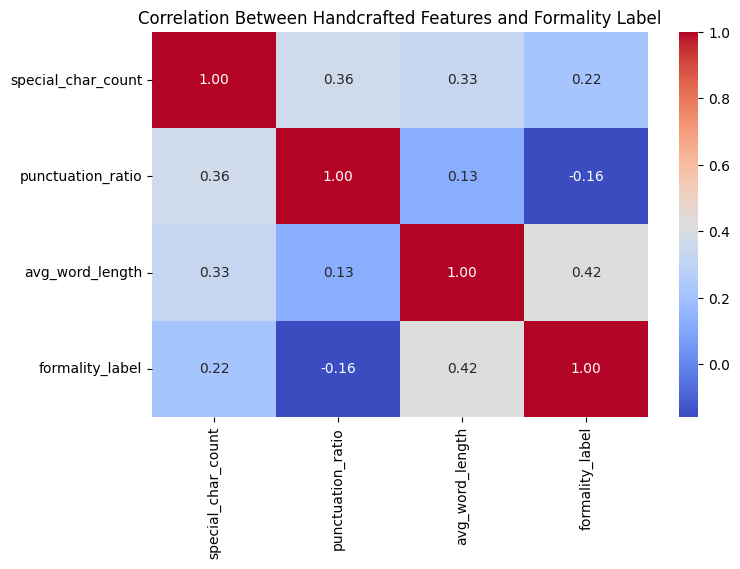

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['special_char_count', 'punctuation_ratio', 'avg_word_length']
df_corr = final_dataset[features + ['formality_label']]

df_corr['formality_label'] = df_corr['formality_label'].astype('category').cat.codes

correlation_matrix = df_corr.corr(method='spearman')

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Handcrafted Features and Formality Label")
plt.show()

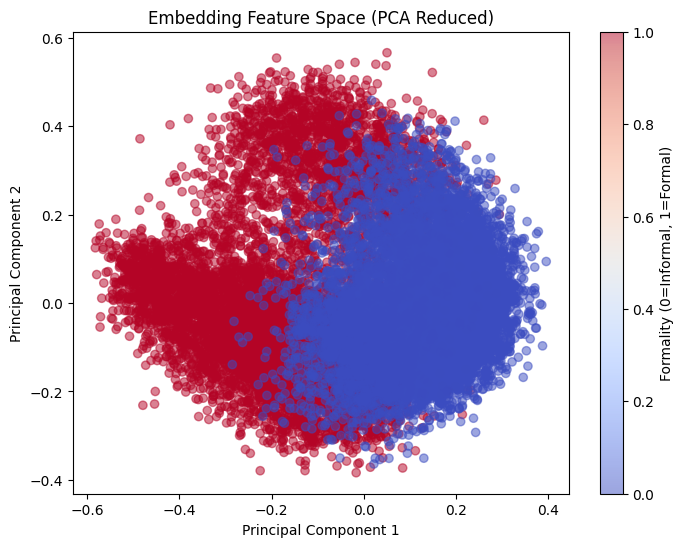

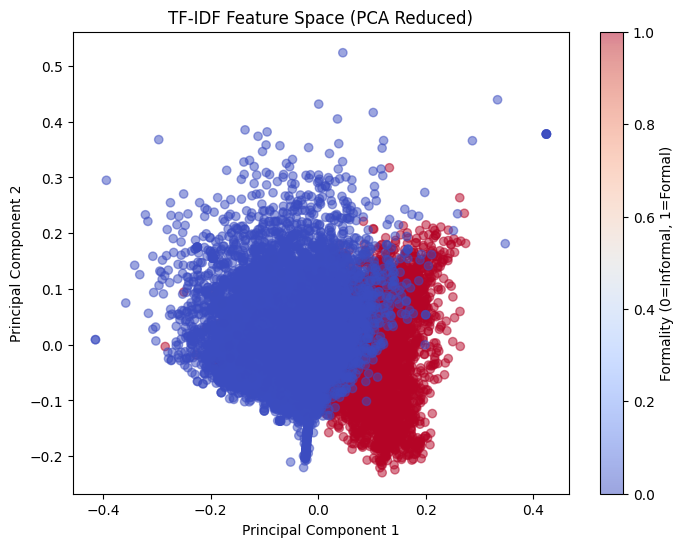

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

tfidf_matrix = np.array(final_dataset['embedding_vector'].tolist())

pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix)

plt.figure(figsize=(8,6))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=final_dataset['formality_label'], cmap='coolwarm', alpha=0.5)
plt.title("Embedding Feature Space (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Formality (0=Informal, 1=Formal)")
plt.show()

from sklearn.decomposition import PCA

tfidf_matrix = np.array(final_dataset['tfidf_vector'].tolist())

pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix)

plt.figure(figsize=(8,6))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=final_dataset['formality_label'], cmap='coolwarm', alpha=0.5)
plt.title("TF-IDF Feature Space (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Formality (0=Informal, 1=Formal)")
plt.show()



In [27]:

# Training accuracy
y_train_pred = rf_model_final.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Test Accuracy: 0.9493


In [28]:
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of each tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
#     'max_features': ['sqrt', 'log2', None]  # Number of features to consider for the best split
# }

# rf_model = RandomForestClassifier(random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=rf_model,
#     param_distributions=param_grid,
#     n_iter=20,  # Number of random parameter combinations to try
#     cv=5,  # Cross-validation folds
#     verbose=2,
#     n_jobs=-1,  # Use all available CPU cores
#     random_state=42
# )

# random_search.fit(X_train, y_train)

# print("Best Hyperparameters:", random_search.best_params_)

# best_rf_model = RandomForestClassifier(**random_search.best_params_, random_state=42)
# best_rf_model.fit(X_train, y_train)

# y_pred = best_rf_model.predict(X_test)

# from sklearn.metrics import accuracy_score, classification_report
# print("Optimized Model Evaluation")
# print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print("Classification Report:\n", classification_report(y_test, y_pred))


In [29]:
# import requests
# import json

# # Define the Ollama API URL
# OLLAMA_URL = "http://localhost:11434/api/generate"

# # Function to classify text using LLaMA 3.2b
# def classify_with_llama(text):
#     """
#     Classifies the text as formal (1) or informal (0) using LLaMA 3.2b.
#     """
#     prompt = f"""
#     You are an expert in text classification. Your task is to determine if the given text is **formal** or **informal**.
    
#     Please STRICTLY output only 1 for formal and 0 for informal—nothing else.

#     Examples:
#     - **Input:** "Dear Sir, I appreciate your prompt response."
#       **Output:** 1
#     - **Input:** "Hey dude, what’s up?"
#       **Output:** 0
#     - **Input:** "Kindly provide the requested documents by tomorrow."
#       **Output:** 1
#     - **Input:** "Yo, check this out!"
#       **Output:** 0

#     **Input:** "{text}"
#     **Output:** 
#     """

#     payload = {
#         "model": "llama3.2",
#         "prompt": prompt,
#         "stream": False
#     }

#     response = requests.post(OLLAMA_URL, json=payload)

#     try:
#         result = response.json()  # Print entire response
#         print("Raw Response:", result)  # Debugging
#         llama_output = result["response"].strip()
        
#         if llama_output in ["0", "1"]:
#             return int(llama_output)
#         else:
#             print(f"Unexpected output: {llama_output}")
#             return None
#     except Exception as e:
#         print(f"Error processing response: {e}")
#         return None


# final_dataset["llama_prediction"] = final_dataset["description"].apply(classify_with_llama)


# from sklearn.metrics import accuracy_score, classification_report

# print("Evaluation using LLaMA 3.2b")
# print(f"Test Accuracy: {accuracy_score(final_dataset['formality_label'], final_dataset['llama_prediction']):.4f}")
# print("Classification Report:\n", classification_report(final_dataset['formality_label'], final_dataset['llama_prediction']))
